# Traitement d'image
# tp3 : morphologie mathématique
@ author : BAHI Ouadie

In [17]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import skimage as ski
from sklearn.metrics import mean_squared_error
import imagecodecs

## Préparation des images et prétraitement

In [18]:
img = ski.io.imread('./asset/leaves.tif')

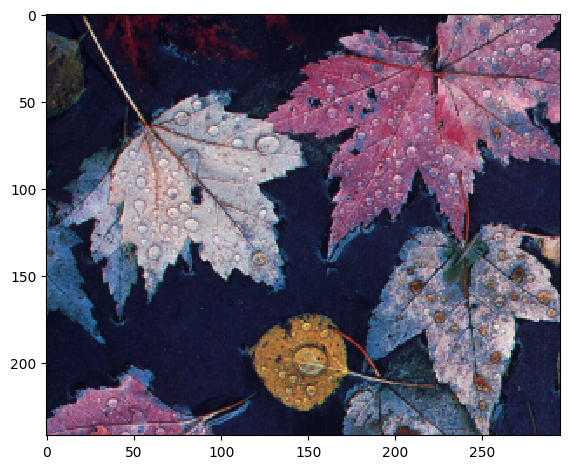

In [19]:
ski.io.imshow(img)

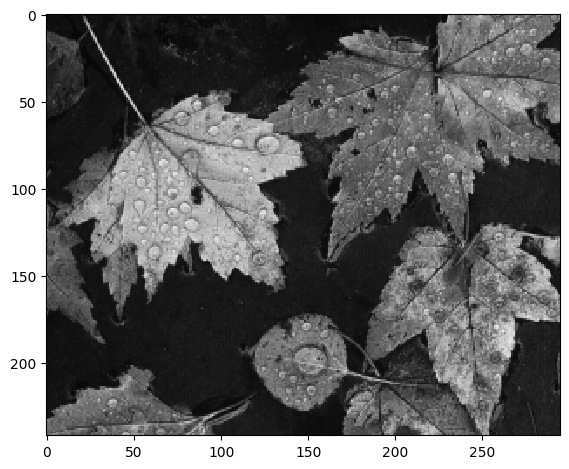

In [20]:
img_gray = ski.color.rgb2gray(img)
ski.io.imshow(img_gray)

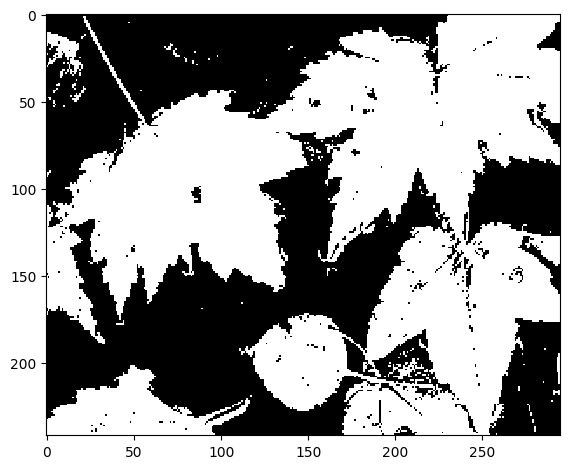

In [21]:
img_bin = img_gray > 0.2
ski.io.imshow(img_bin)

## Opération d’érosion

In [22]:
def mse(image1, image2) :
    if image1.shape != image2.shape :
        raise Exception
    mse = np.mean(np.logical_xor(image1, image2)**2)
    return mse

In [23]:
footprint_square_3 = ski.morphology.square(3)
footprint_square_5 = ski.morphology.square(5)
footprint_disk_3 = ski.morphology.disk(3)
footprint_disk_5 = ski.morphology.disk(5)

In [24]:
erosion_square_3 = ski.morphology.binary_erosion(img_bin, footprint=footprint_square_3)
erosion_square_3_2 = ski.morphology.binary_erosion(erosion_square_3, footprint=footprint_square_3)
erosion_square_5 = ski.morphology.binary_erosion(img_bin, footprint=footprint_square_5)
erosion_disk_3 = ski.morphology.binary_erosion(img_bin, footprint=footprint_disk_3)
erosion_disk_5 = ski.morphology.binary_erosion(img_bin, footprint=footprint_disk_5)

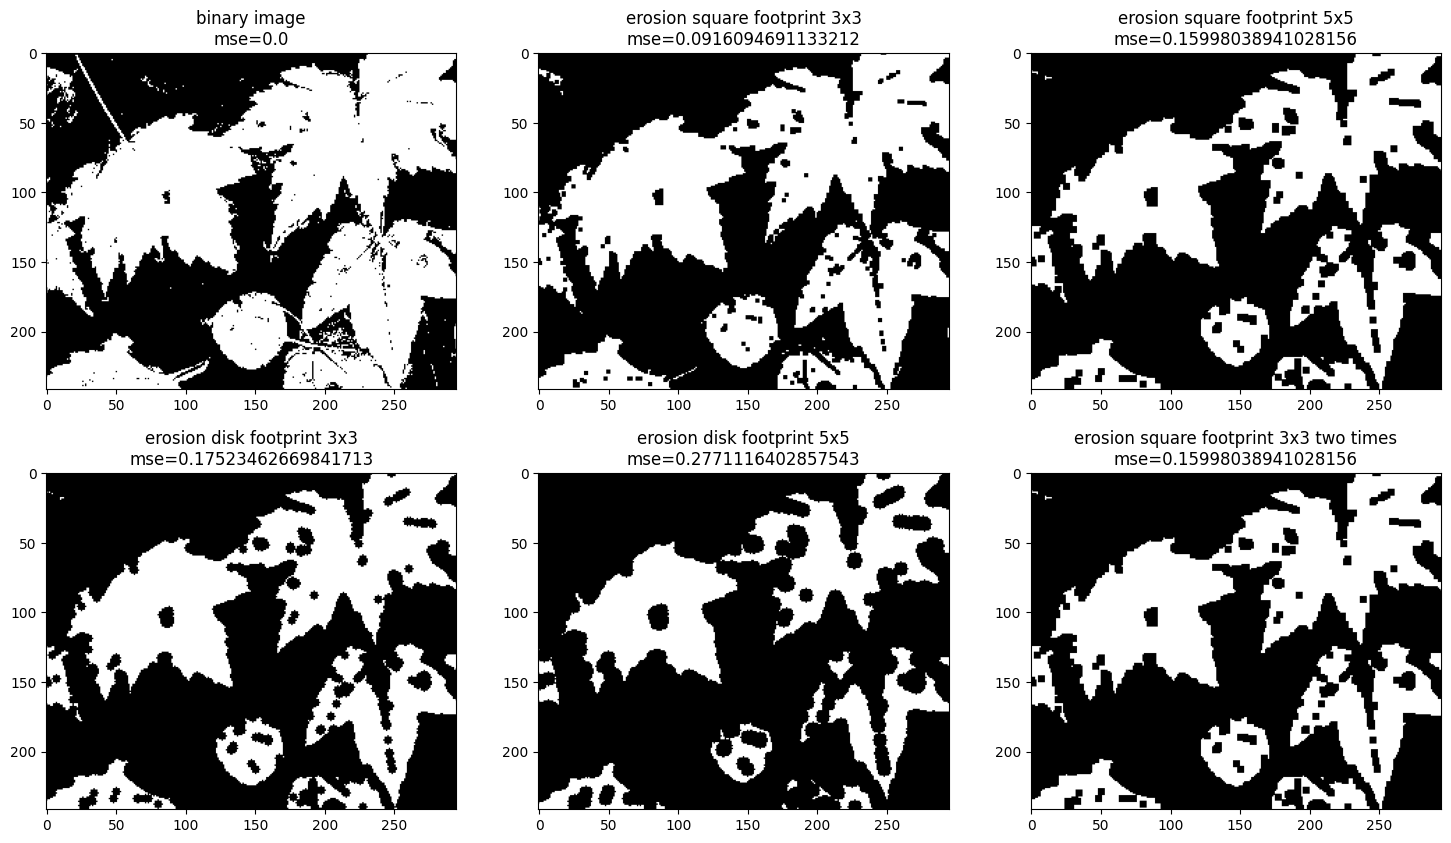

In [25]:
images = [img_bin, erosion_square_3, erosion_square_5, erosion_disk_3, erosion_disk_5, erosion_square_3_2]
titles = ['binary image',
          'erosion square footprint 3x3',
          'erosion square footprint 5x5',
          'erosion disk footprint 3x3',
          'erosion disk footprint 5x5',
          'erosion square footprint 3x3 two times']
plt.figure(figsize=(18, 10))
for i in range(6) :
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i] + '\nmse=' + str(mse(img_bin, images[i])))

plt.show()

## Dilatation

In [26]:
dilation_square_3 = ski.morphology.binary_dilation(img_bin, footprint=footprint_square_3)
dilation_square_3_2 = ski.morphology.binary_dilation(dilation_square_3, footprint=footprint_square_3)
dilation_square_5 = ski.morphology.binary_dilation(img_bin, footprint=footprint_square_5)
dilation_disk_3 = ski.morphology.binary_dilation(img_bin, footprint=footprint_disk_3)
dilation_disk_5 = ski.morphology.binary_dilation(img_bin, footprint=footprint_disk_5)


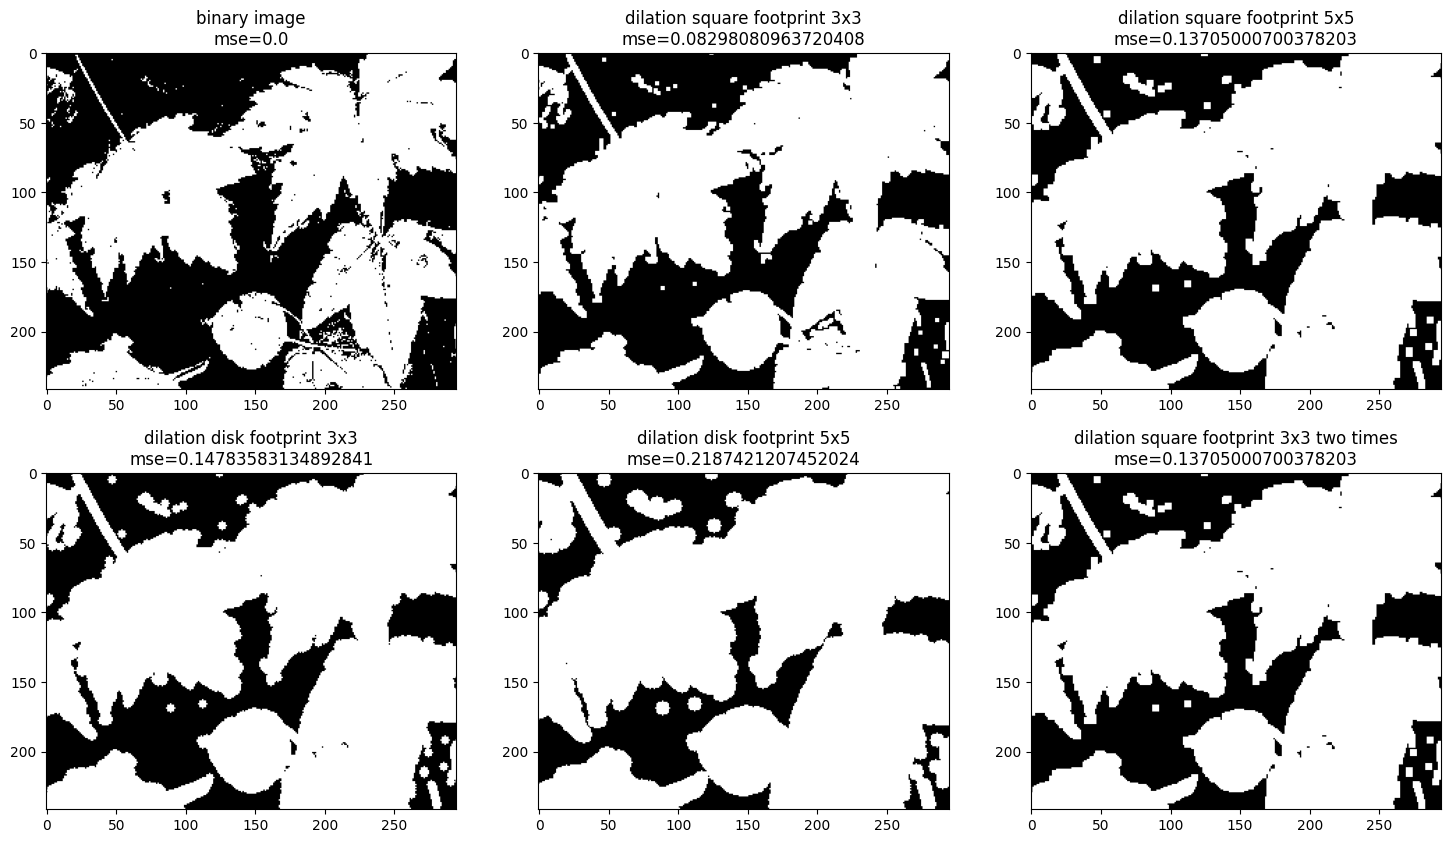

In [27]:
images = [img_bin, dilation_square_3, dilation_square_5, dilation_disk_3, dilation_disk_5, dilation_square_3_2]
titles = ['binary image',
          'dilation square footprint 3x3',
          'dilation square footprint 5x5',
          'dilation disk footprint 3x3',
          'dilation disk footprint 5x5',
          'dilation square footprint 3x3 two times']
plt.figure(figsize=(18, 10))
for i in range(6) :
        plt.subplot(2,3,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i] + '\nmse=' + str(mse(img_bin, images[i])))

plt.show()

## Ouverture et fermeture

### Ouverture

In [28]:
opening_square_3 = ski.morphology.binary_dilation(erosion_square_3, footprint=footprint_square_3)
opening_square_3_ = ski.morphology.binary_opening(img_bin, footprint=footprint_square_3)
# dilation_square_3_2 = ski.morphology.binary_dilation(dilation_square_3, footprint=footprint_square_3)
opening_square_5 = ski.morphology.binary_dilation(erosion_square_5, footprint=footprint_square_5)
opening_square_5_ = ski.morphology.binary_opening(img_bin, footprint=footprint_square_5)
opening_disk_3 = ski.morphology.binary_dilation(erosion_disk_3, footprint=footprint_disk_3)
opening_disk_3_ = ski.morphology.binary_opening(img_bin, footprint=footprint_disk_3)
opening_disk_5 = ski.morphology.binary_dilation(erosion_disk_5, footprint=footprint_disk_5)
opening_disk_5_ = ski.morphology.binary_opening(img_bin, footprint=footprint_disk_5)

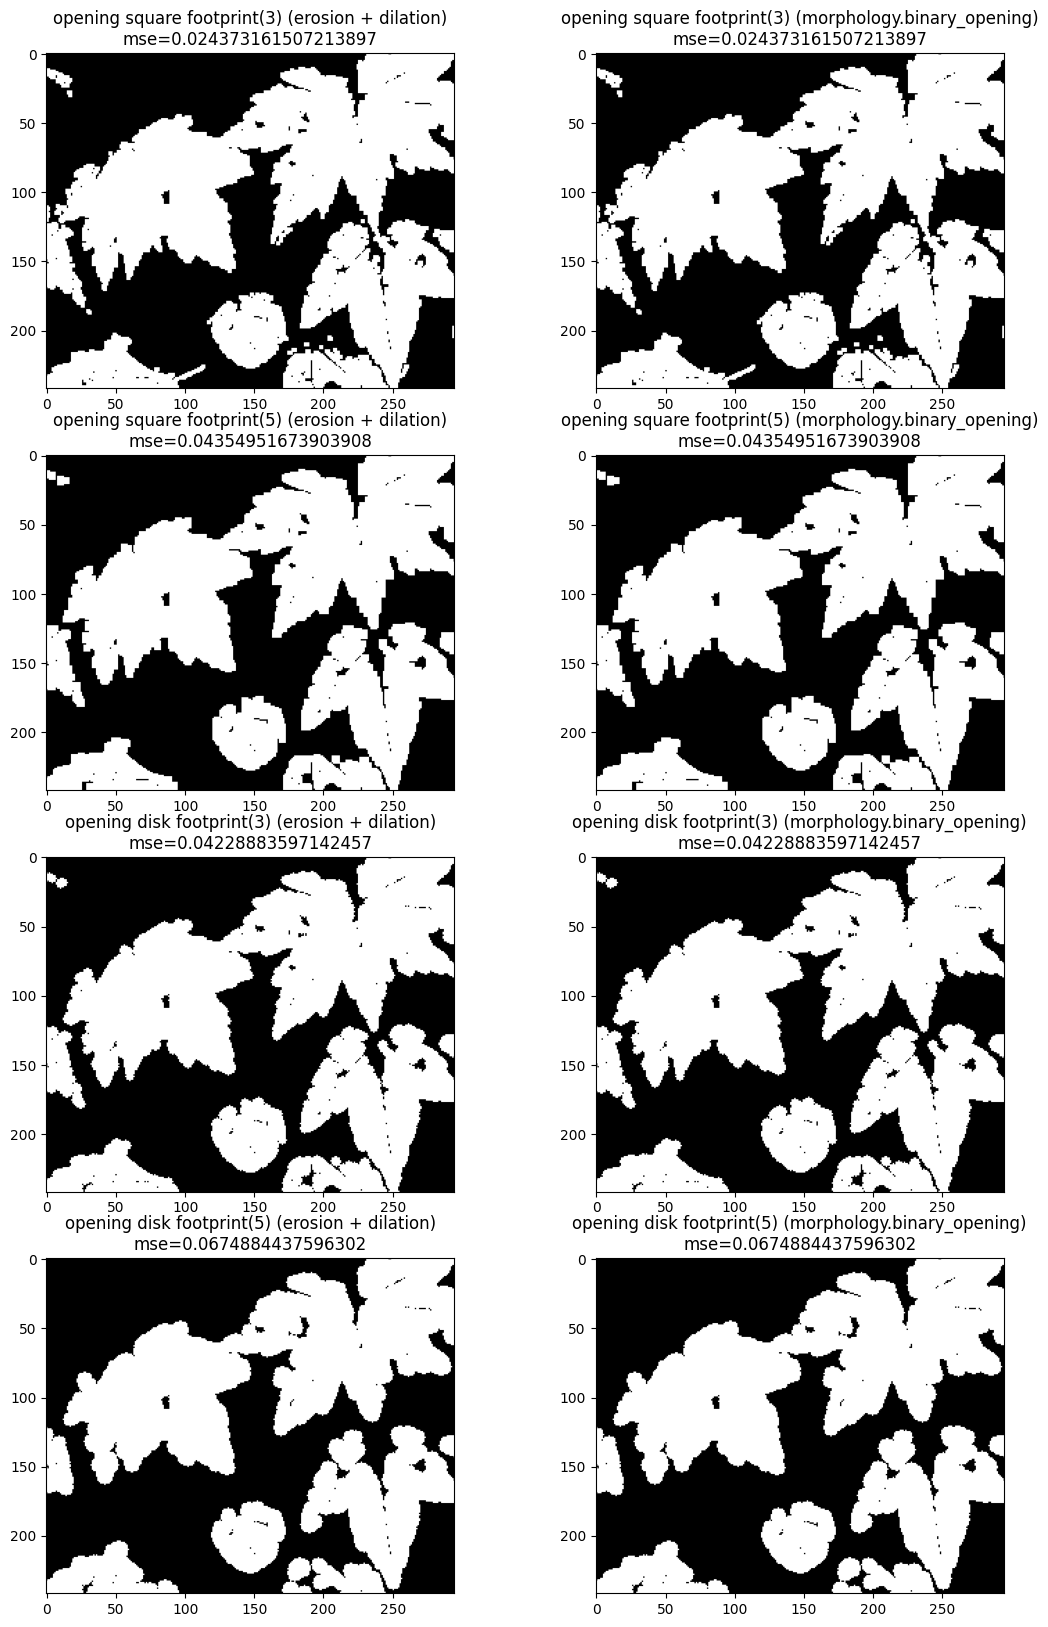

In [29]:
images = [opening_square_3, opening_square_3_, opening_square_5, opening_square_5_, opening_disk_3, opening_disk_3_, opening_disk_5, opening_disk_5_]
titles = ['opening square footprint(3) (erosion + dilation)',
          'opening square footprint(3) (morphology.binary_opening)',
          'opening square footprint(5) (erosion + dilation)',
          'opening square footprint(5) (morphology.binary_opening)',
          'opening disk footprint(3) (erosion + dilation)',
          'opening disk footprint(3) (morphology.binary_opening)',
          'opening disk footprint(5) (erosion + dilation)',
          'opening disk footprint(5) (morphology.binary_opening)']
plt.figure(figsize=(13, 20))
for i in range(8) :
        plt.subplot(4,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i] + '\nmse=' + str(mse(img_bin, images[i])))

plt.show()

In [30]:
n = 10
opening_img = img_bin
for i in range(n) :
    opening_img = ski.morphology.binary_opening(opening_img, footprint=footprint_disk_3)

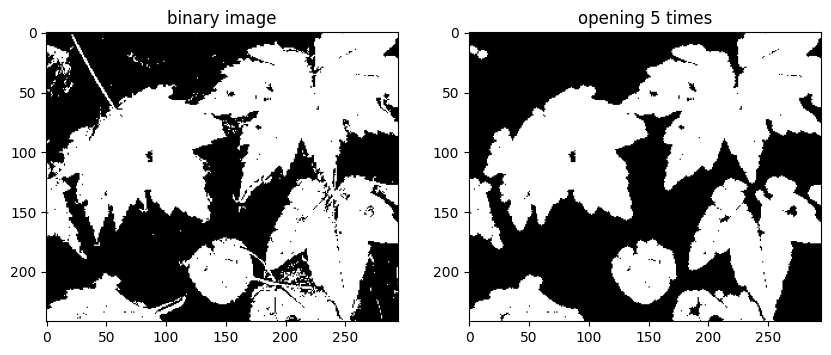

In [31]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.imshow(img_bin, "gray")
plt.title("binary image")

plt.subplot(1,2,2)
plt.imshow(opening_img, "gray")
plt.title("opening 5 times")

plt.show()

### Fermeture

In [32]:
closing_square_3 = ski.morphology.binary_erosion(dilation_square_3, footprint=footprint_square_3)
closing_square_3_ = ski.morphology.binary_closing(img_bin, footprint=footprint_square_3)
closing_square_5 = ski.morphology.binary_erosion(dilation_square_5, footprint=footprint_square_5)
closing_square_5_ = ski.morphology.binary_closing(img_bin, footprint=footprint_square_5)
closing_disk_3 = ski.morphology.binary_erosion(dilation_disk_3, footprint=footprint_disk_3)
closing_disk_3_ = ski.morphology.binary_closing(img_bin, footprint=footprint_disk_3)
closing_disk_5 = ski.morphology.binary_erosion(dilation_disk_5, footprint=footprint_disk_5)
closing_disk_5_ = ski.morphology.binary_closing(img_bin, footprint=footprint_disk_5)

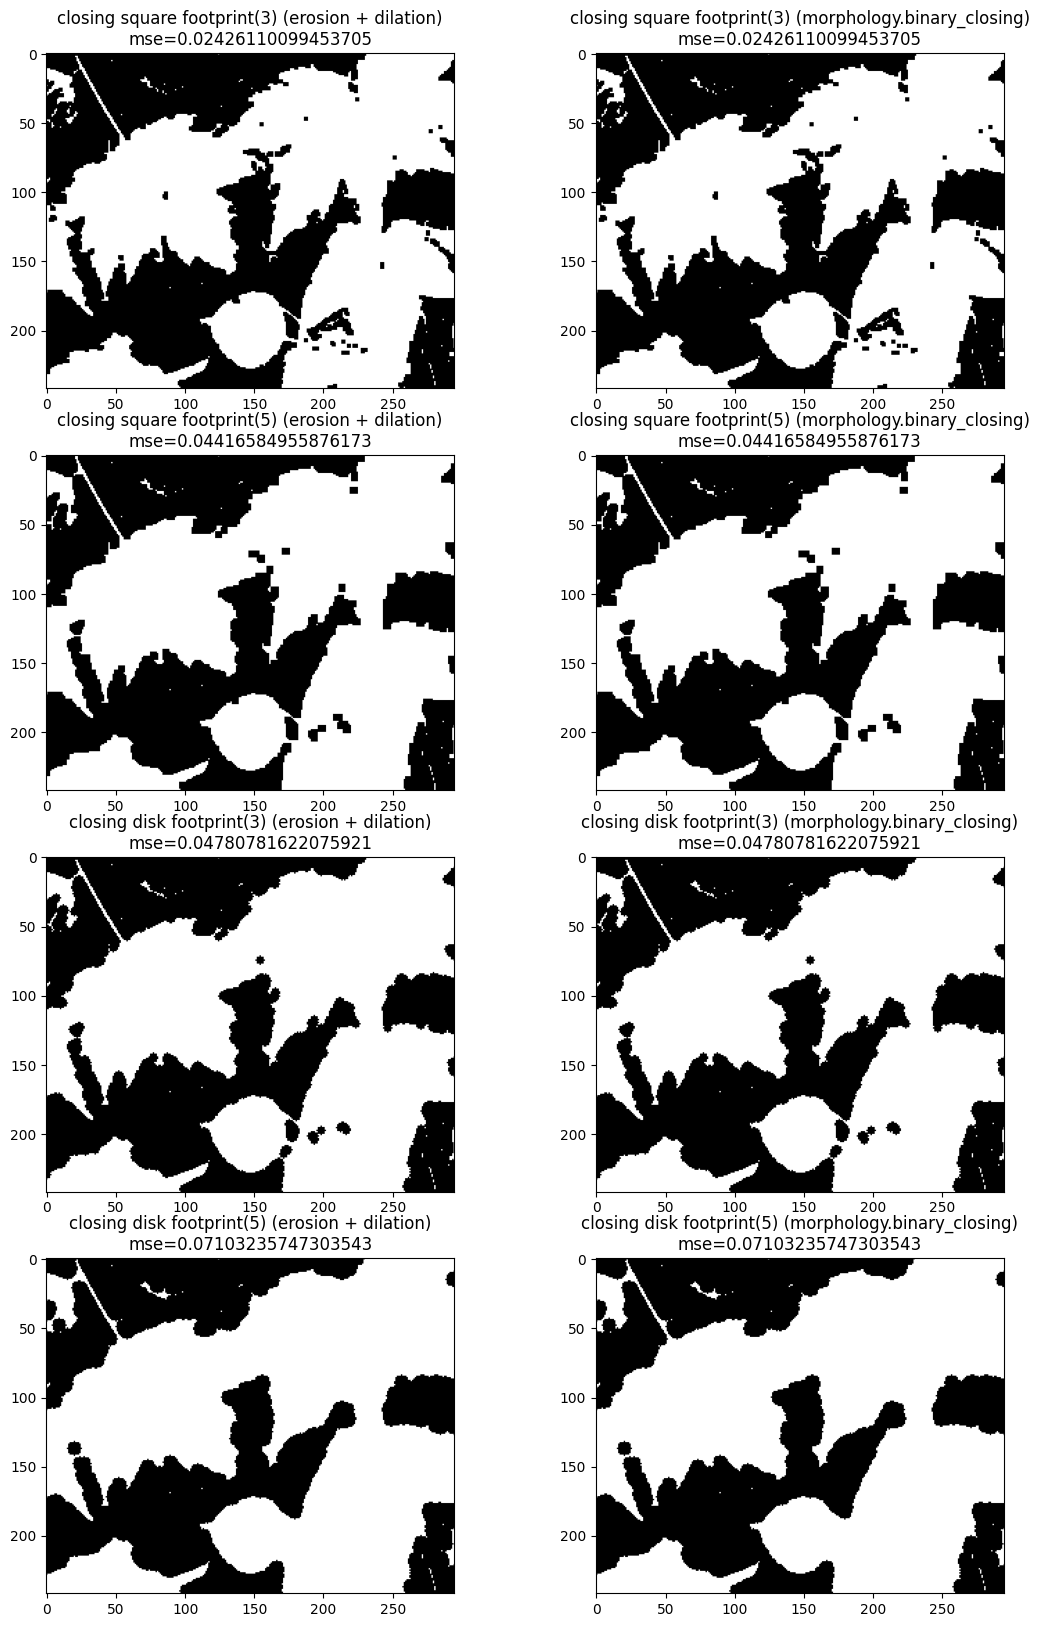

In [33]:
images = [closing_square_3, closing_square_3_, closing_square_5, closing_square_5_, closing_disk_3, closing_disk_3_, closing_disk_5, closing_disk_5_]
titles = ['closing square footprint(3) (erosion + dilation)',
          'closing square footprint(3) (morphology.binary_closing)',
          'closing square footprint(5) (erosion + dilation)',
          'closing square footprint(5) (morphology.binary_closing)',
          'closing disk footprint(3) (erosion + dilation)',
          'closing disk footprint(3) (morphology.binary_closing)',
          'closing disk footprint(5) (erosion + dilation)',
          'closing disk footprint(5) (morphology.binary_closing)']
plt.figure(figsize=(13, 20))
for i in range(8) :
        plt.subplot(4,2,i+1)
        plt.imshow(images[i], "gray")
        plt.title(titles[i] + '\nmse=' + str(mse(img_bin, images[i])))

plt.show()